In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('../Datasets/SalaryData.csv')
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [15]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [16]:
X = df[['YearsExperience']]
y = df[['Salary']]

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr = lr.fit(X, y)

y_pred = lr.predict(X)

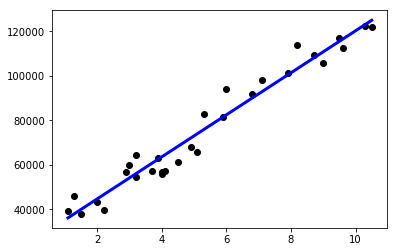

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.show();

In [19]:
print('SKLearn Summary:\n')
print('Linear Regression R²:',np.round(lr.score(X, y),3))
print('Linear Regression Coefs:', lr.coef_)
print('Linear Regression Intercept:', lr.intercept_ )

SKLearn Summary:

Linear Regression R²: 0.957
Linear Regression Coefs: [[9449.96232146]]
Linear Regression Intercept: [25792.20019867]


In [61]:
lr.intercept_[0] + lr.coef_[0]*4

array([63592.04948449])

In [54]:
import statsmodels.formula.api as smf

smf_lr = smf.ols(formula='Salary ~ YearsExperience', data=df)
#smf_lr = smf.OLS(y, X)
smf_results = smf_lr.fit()
smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 24 Jun 2018   Prob (F-statistic):           1.14e-20
Time:                        19:55:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(re, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

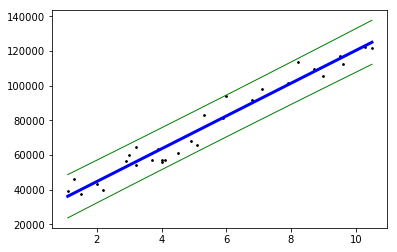

In [128]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#wls_prediction_std() accept a second argument, exog
std_error, y_pred_lower, y_pred_upper = wls_prediction_std(smf_results)

plt.scatter(X, y,  color='black', s=3)
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.plot(X, y_pred_lower, color='green', linewidth=1)
plt.plot(X, y_pred_upper, color='green', linewidth=1)
plt.show();

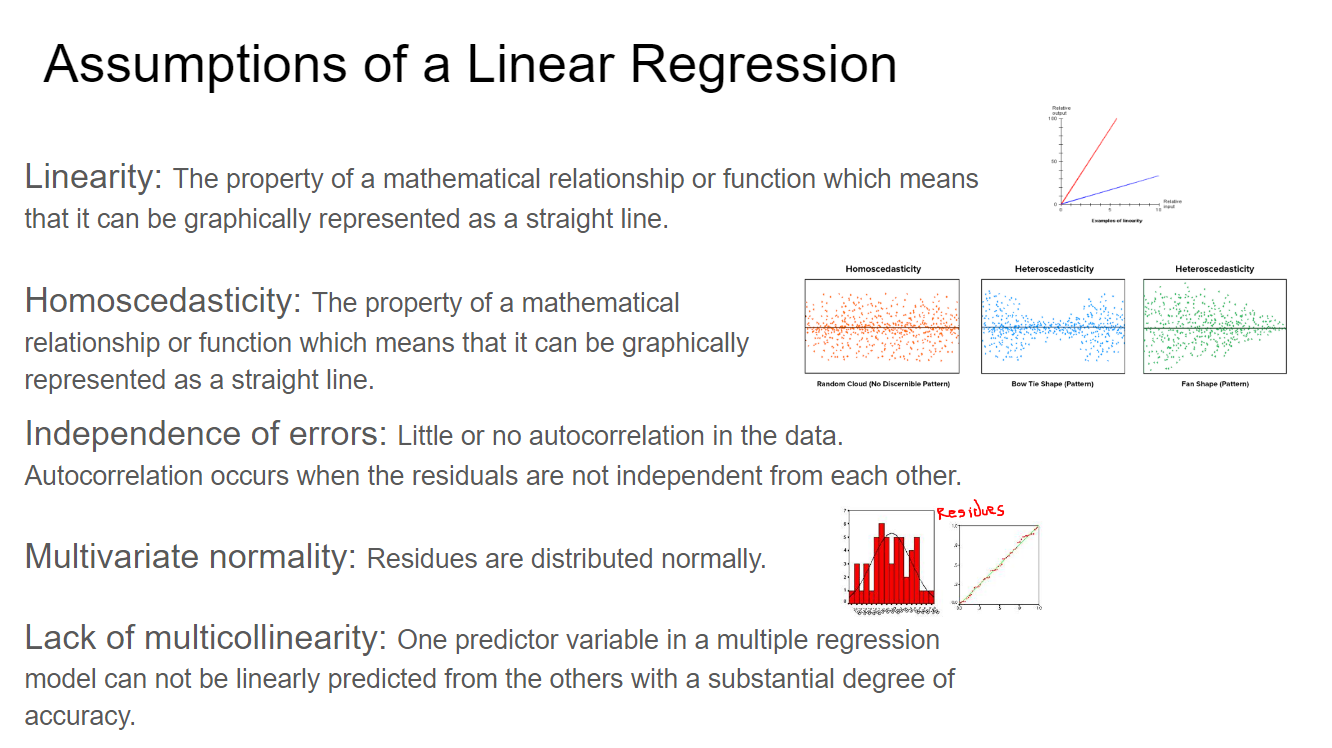

In [11]:
from IPython.display import Image

Image(filename = '../Images/Linear Regression Assumptions.PNG', width=1000, height=1000)